### Optical Character Recognition (Digits)

March 30, 2016

Author: Gael Varoquaux (gael dot varoquaux at normalesup dot org)
License: BSD 3 clause

In this demo, we will build a model that classifies images as one of the 10 Arabic numerals.

Import datasets, classifiers and performance metrics.
For this demo, we will use MATPLOTLIB to plot the digit images.

In [4]:
from sklearn import datasets, svm, metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import bokeh
import seaborn

In [11]:
import alabaster

In [6]:
#library(ggplot2)

The data that we are interested in is made of 8x8 images of digits, let's
have a look at the first 10 images, stored in the `images` attribute of the
dataset.  If we were working from image files, we could load them using
pylab.imread.  Note that each image must have the same size. For these
images, we know which digit they represent: it is given in the 'target' of
the dataset.

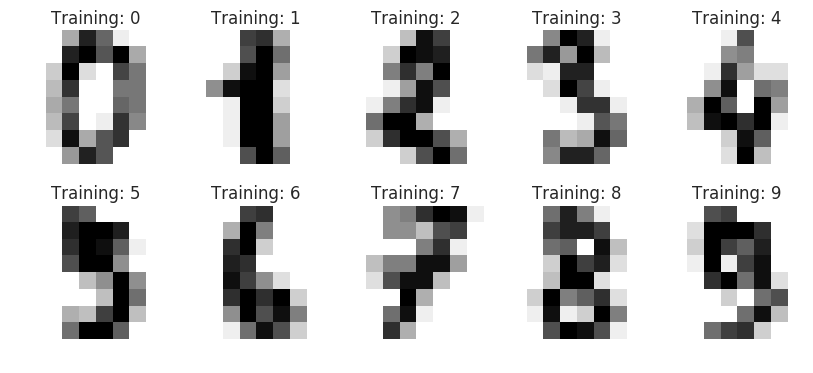

In [7]:
digits = datasets.load_digits()

plt.figure(figsize=(10, 4))
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2,5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

plt.subplots_adjust(hspace=0.3)

Now let's build a classifier!  For details about the Support Vector Machine fucntion here, go to http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

We'll use the first half of the sample data to train the model.  The second half will be held out from the training process and used to test the model.

In [8]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

Lets look at the results in the form of [precision, recall, and F-score](https://en.wikipedia.org/wiki/Precision_and_recall).

A more detailed error analysis is possible by looking at the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

In [9]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

Now let's plot some of the test data and predictions.

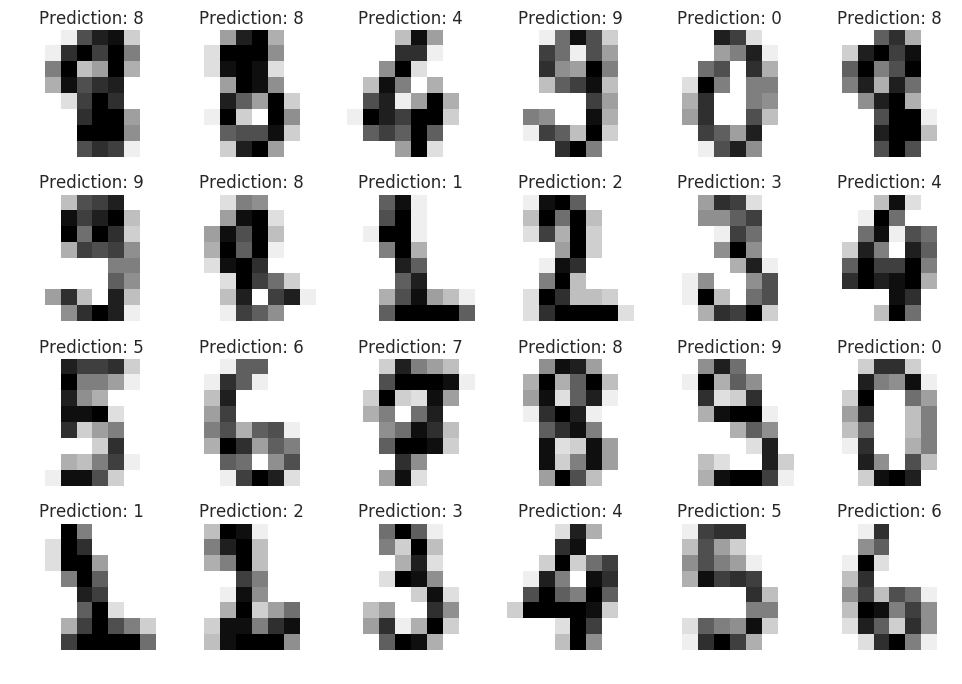

In [10]:
images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))

plt.figure(figsize=(12, 8))
for index, (image, prediction) in enumerate(images_and_predictions[:24]):
    plt.subplot(4, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.subplots_adjust(hspace=0.3)
